# Naive Bayes

The idea of this project is to write a simple Naive Bayes model to predict if a SMS message is spam or not.

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import csv
import sklearn
import pickle
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV,train_test_split,StratifiedKFold,cross_val_score,learning_curve
from wordcloud import WordCloud

## Load the dataset

In [8]:
data = pd.read_csv('../datasets/spam.csv', encoding='latin-1')
data = data.rename(columns={"Target":"label", "SMS":"sms"})
data.head()

,label,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
data['label'].value_counts()

ham     4778
spam     743
Name: label, dtype: int64

## Preprocessing the dataset

In [10]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

ham_words = []
for sms in data[data['label'] == 'ham'].sms:
    text = sms.lower()
    tokens = nltk.word_tokenize(text)
    # remove stop words
    filtered_tokens = [w.lower() for w in tokens if not w in stop_words and w.isalpha() and len(w) > 2]
    # filter with lemmatizer
    filtered_tokens = [lemmatizer.lemmatize(w) for w in filtered_tokens]
    ham_words.extend(filtered_tokens)
print(f'HAM {len(ham_words)}')

spam_words = []
for sms in data[data['label'] == 'spam'].sms:
    text = sms.lower()
    tokens = nltk.word_tokenize(text)
    # remove stop words
    filtered_tokens = [w.lower() for w in tokens if not w in stop_words and w.isalpha() and len(w) > 2]
    # filter with lemmatizer
    filtered_tokens = [lemmatizer.lemmatize(w) for w in filtered_tokens]
    spam_words.extend(filtered_tokens)
print(f'SPAM {len(spam_words)}')

ham_string=(' ').join(ham_words)
ham_wordcloud = WordCloud(width=500, height=300).generate(ham_string)

spam_string=(' ').join(spam_words)
spam_wordcloud = WordCloud(width=500, height=300).generate(spam_string)



[nltk_data] Downloading package punkt to /home/mantunes/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/mantunes/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/mantunes/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


HAM 32249
SPAM 8642


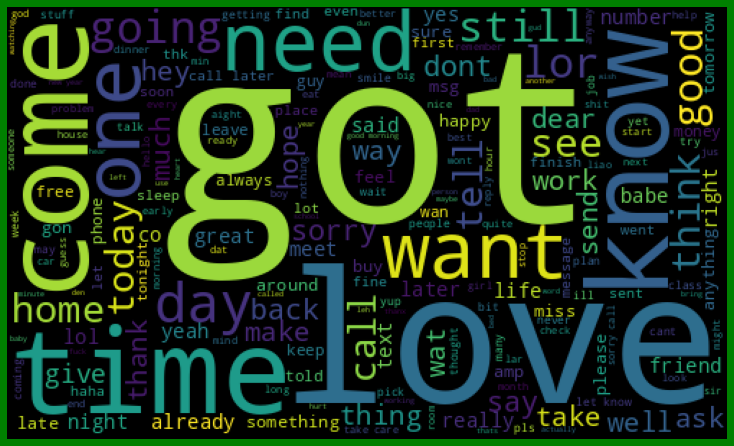

In [11]:
#Creating Ham wordcloud
plt.figure( figsize=(10,8), facecolor='g')
plt.imshow(ham_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

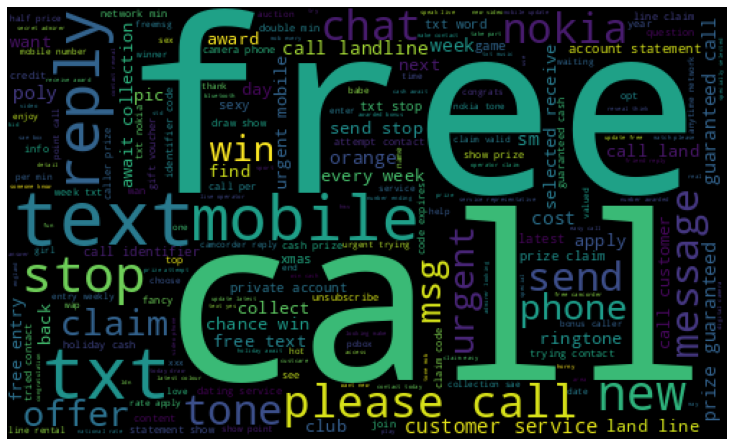

In [12]:
#Spam Word cloud
plt.figure( figsize=(10,8), facecolor='w')
plt.imshow(spam_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()